In [497]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import itertools

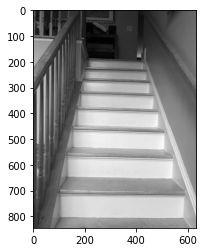

In [498]:
#reading and displaying grayscale input image
my_img = cv2.imread('sample_data/stairs.jpg',0)
img = cv2.cvtColor(my_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [499]:
kernel = cv2.getGaborKernel((31, 31), 5, 2, 10, 1, 0, cv2.CV_32F)
kernel /= math.sqrt((kernel * kernel).sum())

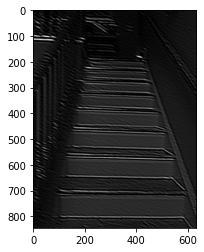

In [500]:
filtered = cv2.filter2D(img, -1, kernel)
plt.imshow(filtered)
plt.show()

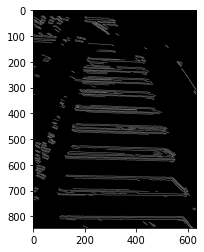

In [501]:
filtered = cv2.cvtColor(filtered, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(filtered,100,200,apertureSize = 3)
edges = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)
plt.imshow(edges)
plt.show()

In [502]:
print (edges.shape)
edges = cv2.cvtColor(edges, cv2.COLOR_RGB2GRAY)
print (edges.shape)

(845, 634, 3)
(845, 634)


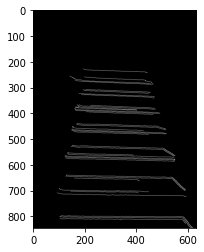

In [503]:
connectivity = 8
min_size = 250
nb_components, output, stats, centroids  = cv2.connectedComponentsWithStats(edges, connectivity,ltype=cv2.CV_32S)
sizes = stats[1:, -1]
nb_components = nb_components - 1
img2 = edges
# for every component in the image, you keep it only if it's above min_size
for i in range(0, nb_components):
    if sizes[i] < min_size:
        img2[output == i + 1] = 0
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

In [504]:
for i in range(0,538,50):
  for j in range(0,718,50):
    region = img2[i:(i+50), j:(j+50),0]
    xlist = range(i,(i+50))
    ylist = range(j,(j+50))
    sx = np.sum(xlist)
    sy = np.sum(ylist)
    sxx = np.dot(xlist,xlist)
    syy = np.dot(ylist,ylist)
    sxy = np.dot(xlist, ylist)
    area = 2500
    slope = (area*sxy - sx*sy)/(area*sxx - sx*sx)
    intercept = (sxx*sy - sx*sxy)/(area*sxx-sx*sx)
    print (slope,intercept," ")

1.0 0.0  
2.5072285450630574 0.2614580129191018  
4.014457090126115 0.5229160258382036  
5.521685635189173 0.7843740387573055  
7.02891418025223 1.0458320516764072  
8.536142725315287 1.307290064595509  
10.043371270378346 1.568748077514611  
11.550599815441403 1.8302060904337127  
13.05782836050446 2.0916641033528145  
14.565056905567518 2.3531221162719165  
16.072285450630574 2.614580129191018  
17.57951399569363 2.87603814211012  
19.086742540756692 3.137496155029222  
20.59397108581975 3.3989541679483235  
22.101199630882807 3.6604121808674255  
0.3536072187757581 -0.036874755975879574  
1.0 0.0  
1.6463927812242418 0.036874755975879574  
2.2927855624484836 0.07374951195175915  
2.939178343672726 0.11062426792763871  
3.5855711248969677 0.1474990239035183  
4.2319639061212095 0.18437377987939785  
4.878356687345452 0.22124853585527743  
5.524749468569693 0.258123291831157  
6.171142249793935 0.2949980478070366  
6.817535031018177 0.3318728037829161  
7.463927812242419 0.36874755975

[[[383.          1.6057029]]

 [[458.          1.6057029]]

 [[638.          1.5882496]]

 [[461.          1.6057029]]

 [[643.          1.5882496]]

 [[321.          1.6057029]]

 [[267.          1.6057029]]

 [[710.          1.5882496]]

 [[804.          1.5707964]]

 [[387.          1.6057029]]

 [[433.          1.6057029]]

 [[568.          1.5882496]]

 [[438.          1.6057029]]

 [[562.          1.6057029]]

 [[380.          1.6057029]]

 [[466.          1.6057029]]

 [[558.          1.5882496]]

 [[800.          1.5707964]]

 [[519.          1.6057029]]

 [[365.          1.6231562]]

 [[224.          1.6057029]]

 [[811.          1.5707964]]

 [[318.          1.6057029]]

 [[696.          1.5882496]]

 [[451.          1.6057029]]

 [[565.          1.5882496]]

 [[301.          1.6057029]]]


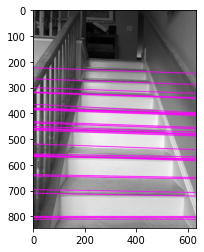

In [505]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
lines = cv2.HoughLines(img2gray,1,np.pi/180,150,None,0,0)
print (lines)
slope_list = []
line_list = []
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        slope = (pt2[1]-pt1[1])/(pt2[0]-pt1[0])
        slope_list.append(slope)
        line_list.append((pt1,pt2))
        cv2.line(img,pt1,pt2,(255,0,255),2,cv2.LINE_AA)
#img2gray = cv2.cvtColor(img2gray, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [506]:
print(line_list)
print(slope_list)

[((-1012, 347), (986, 417)), ((-1015, 422), (983, 492)), ((-1010, 620), (988, 655)), ((-1015, 425), (983, 495)), ((-1011, 625), (988, 660)), ((-1010, 285), (988, 355)), ((-1008, 231), (990, 301)), ((-1012, 692), (987, 727)), ((-1000, 803), (999, 804)), ((-1012, 351), (985, 421)), ((-1014, 397), (984, 467)), ((-1009, 550), (989, 585)), ((-1014, 402), (984, 472)), ((-1019, 526), (979, 596)), ((-1012, 344), (986, 414)), ((-1015, 430), (983, 500)), ((-1009, 540), (990, 575)), ((-1000, 799), (999, 800)), ((-1017, 483), (981, 553)), ((-1017, 312), (979, 416)), ((-1007, 188), (991, 258)), ((-1000, 810), (999, 811)), ((-1010, 282), (988, 352)), ((-1011, 678), (987, 713)), ((-1015, 415), (983, 485)), ((-1009, 547), (989, 582)), ((-1009, 265), (988, 335))]
[0.035035035035035036, 0.035035035035035036, 0.017517517517517518, 0.035035035035035036, 0.017508754377188594, 0.035035035035035036, 0.035035035035035036, 0.017508754377188594, 0.0005002501250625312, 0.03505257886830245, 0.035035035035035036, 

In [507]:
avg_slope = np.mean(slope_list)

In [508]:
print(len(slope_list),avg_slope)

27 0.027288775563731577


27 [(0, 374.61624087049637), (1, 449.69810719718754), (2, 647.5616633193689), (3, 452.69810719718754), (4, 652.5889520949327), (5, 312.5616633193689), (6, 258.50708576824144), (7, 719.6162408704963), (8, 830.2887755637316), (9, 378.61624087049637), (10, 424.67081842162384), (11, 577.5343745438051), (12, 429.67081842162384), (13, 553.8072622994425), (14, 371.61624087049637), (15, 457.69810719718754), (16, 567.5343745438051), (17, 826.2887755637316), (18, 510.752684748315), (19, 339.752684748315), (20, 215.4797969926777), (21, 837.2887755637316), (22, 309.5616633193689), (23, 705.5889520949327), (24, 442.69810719718754), (25, 574.5343745438051), (26, 292.53437454380514)]


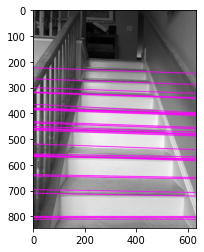

In [509]:
step_count = 0
intercepts_list = []
img_step = cv2.cvtColor(my_img, cv2.COLOR_BGR2RGB)
for i in range(len(slope_list)):
  # if (slope_list[i]<=(1.5*avg_slope) and slope_list[i]>=(0.85*avg_slope)):
  (pt1,pt2) = line_list[i]
  slope_list[i] = avg_slope
  intercepts_list.append((i,pt1[1]-avg_slope*pt1[0]))
  step_count+=1
  cv2.line(img_step,pt1,pt2,(255,0,255),2,cv2.LINE_AA)
  # else:
  slope_list[i] = 0
print(step_count,intercepts_list)
plt.imshow(img_step)
plt.show()

In [510]:
intercepts_list.sort(key=lambda x:x[1])

In [511]:
intercepts_list

[(20, 215.4797969926777),
 (6, 258.50708576824144),
 (26, 292.53437454380514),
 (22, 309.5616633193689),
 (5, 312.5616633193689),
 (19, 339.752684748315),
 (14, 371.61624087049637),
 (0, 374.61624087049637),
 (9, 378.61624087049637),
 (10, 424.67081842162384),
 (12, 429.67081842162384),
 (24, 442.69810719718754),
 (1, 449.69810719718754),
 (3, 452.69810719718754),
 (15, 457.69810719718754),
 (18, 510.752684748315),
 (13, 553.8072622994425),
 (16, 567.5343745438051),
 (25, 574.5343745438051),
 (11, 577.5343745438051),
 (2, 647.5616633193689),
 (4, 652.5889520949327),
 (23, 705.5889520949327),
 (7, 719.6162408704963),
 (17, 826.2887755637316),
 (8, 830.2887755637316),
 (21, 837.2887755637316)]

In [512]:
# intcp = [(x[0],x[1] for x in intercepts_list]
final_lines = []
for k, g in itertools.groupby(intercepts_list, key=lambda n: n[1]//30):
  final_lines.append((list(g)[len(list(g))//2]))

In [513]:
final_lines

[(20, 215.4797969926777),
 (6, 258.50708576824144),
 (26, 292.53437454380514),
 (22, 309.5616633193689),
 (19, 339.752684748315),
 (14, 371.61624087049637),
 (10, 424.67081842162384),
 (3, 452.69810719718754),
 (18, 510.752684748315),
 (13, 553.8072622994425),
 (25, 574.5343745438051),
 (2, 647.5616633193689),
 (23, 705.5889520949327),
 (17, 826.2887755637316)]

(-1007, 188) (991, 258)
(309, 223)
(-1008, 231) (990, 301)
(308, 266)
(-1009, 265) (988, 335)
(306, 300)
(-1010, 282) (988, 352)
(306, 317)
(-1017, 312) (979, 416)
(298, 364)
(-1012, 344) (986, 414)
(304, 379)
(-1014, 397) (984, 467)
(302, 432)
(-1015, 425) (983, 495)
(301, 460)
(-1017, 483) (981, 553)
(299, 518)
(-1019, 526) (979, 596)
(297, 561)
(-1009, 547) (989, 582)
(307, 564)
(-1010, 620) (988, 655)
(306, 637)
(-1011, 678) (987, 713)
(305, 695)
(-1000, 799) (999, 800)
(316, 799)
14


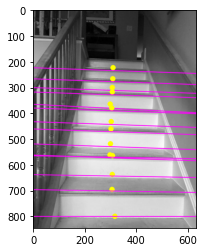

In [514]:
step_close = 0
mid_pts = []
img_step1 = cv2.cvtColor(my_img, cv2.COLOR_BGR2RGB)
for i in range(len(final_lines)):
    (pt1,pt2) = line_list[final_lines[i][0]]
    step_close+=1
    mid_pt = ((pt1[0]+pt2[0])//2+img_step.shape[1]//2,(pt1[1]+pt2[1])//2)
    print (pt1,pt2)
    print (mid_pt)
    mid_pts.append(mid_pt)
    cv2.circle(img_step1, mid_pt,5, (255,255,0), 10)
    cv2.line(img_step1,pt1,pt2,(255,0,255),2,cv2.LINE_AA)
print (step_close)
plt.imshow(img_step1)
plt.show()


In [515]:
mid_pts

[(309, 223),
 (308, 266),
 (306, 300),
 (306, 317),
 (298, 364),
 (304, 379),
 (302, 432),
 (301, 460),
 (299, 518),
 (297, 561),
 (307, 564),
 (306, 637),
 (305, 695),
 (316, 799)]

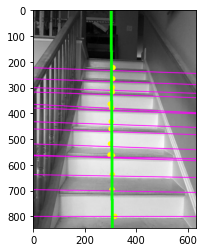

In [516]:
rows,cols = img_step1.shape[:2]
[vx,vy,x,y] = cv2.fitLine(np.float32(mid_pts),cv2.DIST_L2, 0, 0.01, 0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
cv2.line(img_step1,(cols-1,righty),(0,lefty),(0,255,0),10)
plt.imshow(img_step1)
plt.show()